# Identify permitted codons
Quickly figure out which codons are targeted for mutategensis at site 734

In [1]:
import pandas as pd
import plotnine as p9

In [2]:
site_734_counts = '../results/site_734/site_734_counts.csv'

In [3]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

In [4]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,letter
0,AAA,0.00,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K
1,AAA,0.00,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,K
2,AAA,0.00,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K
3,AAA,0.00,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K
4,AAA,0.00,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K
...,...,...,...,...,...,...,...,...,...,...
1467,TGT,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,C
1468,TTA,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,L
1469,TTC,47.75,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,F
1470,TTG,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,L


In [10]:
codon_counts['rank'] = codon_counts.groupby(['name'])['count'].rank(ascending=False, method='first')
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,letter,rank
0,AAA,0.00,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K,6.0
1,AAA,0.00,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,K,23.0
2,AAA,0.00,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K,27.0
3,AAA,0.00,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K,30.0
4,AAA,0.00,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,K,28.0
...,...,...,...,...,...,...,...,...,...,...,...
1467,TGT,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,C,61.0
1468,TTA,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,L,62.0
1469,TTC,47.75,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,F,21.0
1470,TTG,0.00,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,L,63.0


/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


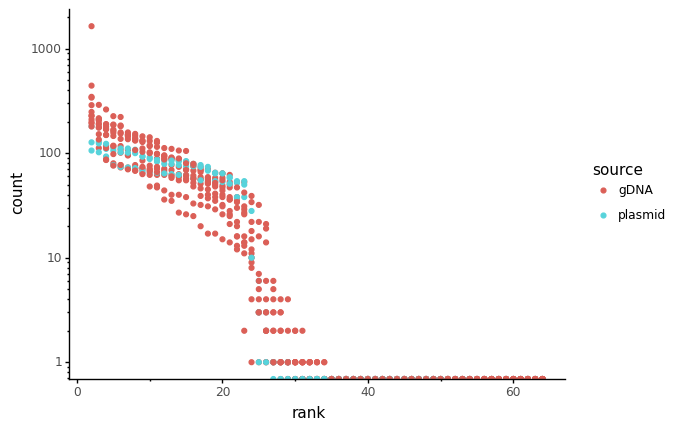

<ggplot: (8754285064677)>

In [22]:
plot = (p9.ggplot(codon_counts
                  .query('codon != wildtype and '
                         'library != "wt" and '
                         'library != "mean"'),
                 p9.aes(x='rank',
                        y='count',
                        color='source')) +
        p9.scale_y_log10() +
        p9.geom_point())
display(plot)

In [47]:
(codon_counts
 .query('codon != wildtype and '
        'library != "wt" and '
        'library != "mean" and '
        'source == "plasmid" and '
        'rank > 20 and rank < 26'))

,codon,count,library,name,site,sorted,source,stage,wildtype,letter,rank
53,AAT,28.0,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N,24.0
54,AAT,6.0,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N,25.0
55,AAT,10.0,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N,24.0
89,ACC,54.0,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,T,22.0
155,AGC,52.0,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,S,22.0
224,ATC,38.0,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,I,22.0
665,GCT,1.0,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,A,25.0
699,GGC,50.0,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,G,23.0
700,GGC,38.0,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,G,23.0
701,GGC,54.0,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,G,23.0


In [67]:
(codon_counts
 .query('library != "wt" and '
        'library != "mean" and '
        'source == "plasmid" and '
        'rank < 23')).groupby(['letter'])['codon'].nunique()

letter
A    1
C    1
D    2
E    1
F    1
G    1
H    1
I    1
K    1
L    1
M    1
N    1
O    1
P    1
Q    1
R    1
S    1
T    1
V    1
W    1
Y    1
Name: codon, dtype: int64

**Taking the top 23 codons + WT produces a single codon per letter and fits well with the data.** There are some other codons found with counts on the order of 10 across all 3 samples (`AAT` specifically). Can revisit these when I get official list from Blake.

In [70]:
permitted_codons = (codon_counts
 .query('library != "wt" and '
        'library != "mean" and '
        'source == "plasmid" and '
        'rank < 23'))[['codon']].drop_duplicates()
print(permitted_codons)
permitted_codons.to_csv('../results/site_734/permitted_codons.csv', index=False, header=False)

     codon
19     AAC
36     AAG
87     ACC
138    AGA
155    AGC
223    ATC
240    ATG
291    CAC
308    CAG
359    CCC
512    CTG
563    GAC
580    GAG
597    GAT
631    GCC
733    GGT
784    GTG
835    TAC
954    TGA
971    TGC
988    TGG
1039   TTC
